In [1]:
#import packages for checking through the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn as sk
from scipy import stats
from scipy.stats import norm, skew, iqr
from scipy.special import boxcox1p
from sklearn import preprocessing
#just to ignore warnings for now
import warnings
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
#load data
train = pd.read_csv("train.csv", delimiter=",")
test = pd.read_csv("test.csv", delimiter=",")

#save the 'Id' columns
trainId = train['Id']
testId = test['Id']

#save the train shape for when we recombine later
nTrain = train.shape[0] #.shape gets the length
nTest = test.shape[0]

In [3]:
#find out info about the sale value
train["SalePrice"].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

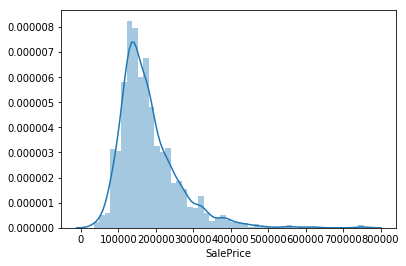

In [4]:
#histogram to get a better understanding of potential outliers
sns.distplot(train['SalePrice'])

In [5]:
#just for practise make something to find the mean of a list
def mean(values, length):
    new = 0
    for value in values:
        new = new + value
    return (new/length)

In [6]:
tempList = train['SalePrice']
tempMean = mean(tempList, nTrain)
print(tempMean)

180921.19589041095


In [7]:
#standard deviation function for practise
def standardDeviation(listValues, mean, length):
    new = 0
    for value in listValues:
        temp = 0
        temp = value - mean
        new = new + (math.pow(temp,2))
    variance = (new/length)
    return(math.sqrt(variance))

In [8]:
cat = standardDeviation(tempList, tempMean, nTrain)
print(cat)

79415.29188606751


In [9]:
np.std(train['SalePrice'])

79415.29188606751

In [10]:
iqr(tempList)

84025.0

In [11]:
#kinda can see from the inter quartile range that the average of the mid 50% of the data is pretty close, the standard deviation
#is pretty large due to the large outliers present in the data, could trim that and rechekck tbh

In [12]:
train = train.drop(train[(train['SalePrice'] > 500000)].index)

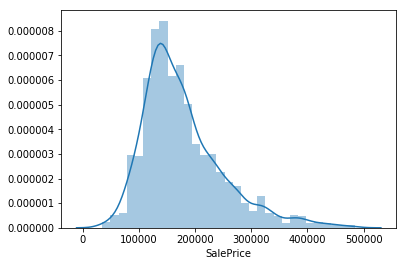

In [13]:
sns.distplot(train['SalePrice'])

In [14]:
tempList = train['SalePrice']
tempMean = mean(tempList, nTrain)
cat = standardDeviation(tempList, tempMean, nTrain)
print(cat)

71652.86976213


In [15]:
iqr(tempList)

83100.0

In [16]:
#well thats better.... somewhat

In [17]:
#checking the bullshit things from last time no need to repeat what i said but check relationship with
#numerical values and sale price of the most correlated ones by look and maybe thought

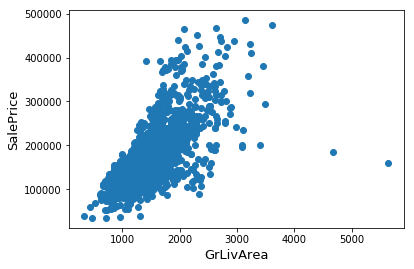

In [18]:
#One of the high related to sale price GrLivArea(living area square feet)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

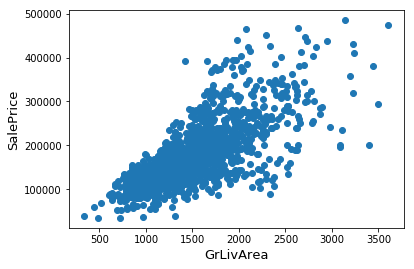

In [19]:
#now we can see the outliers lets remove them from the data
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#Re-look at the GrLivArea after removing outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

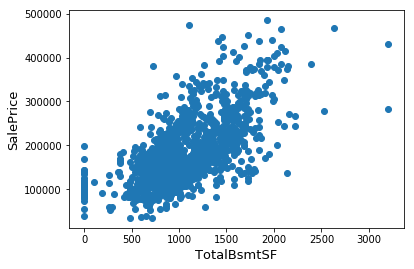

In [20]:
#same with totalBsmtSF (total basement area)
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

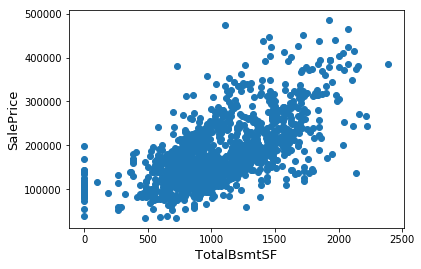

In [21]:
#now we can see the outliers lets remove them from the data
train = train.drop(train[(train['TotalBsmtSF']>2500) & (train['SalePrice']<500000)].index)
#visualize once the outliers are removed
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

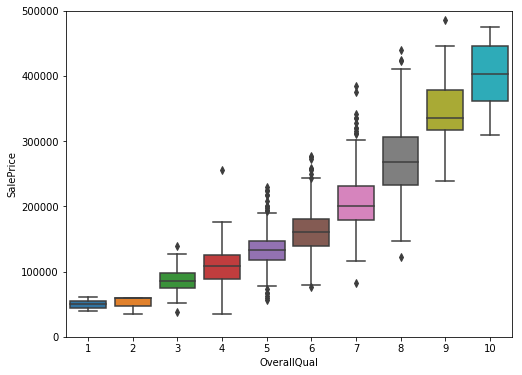

In [22]:
#box plot overallqual/saleprice (quality of materials used for the house)
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=500000);

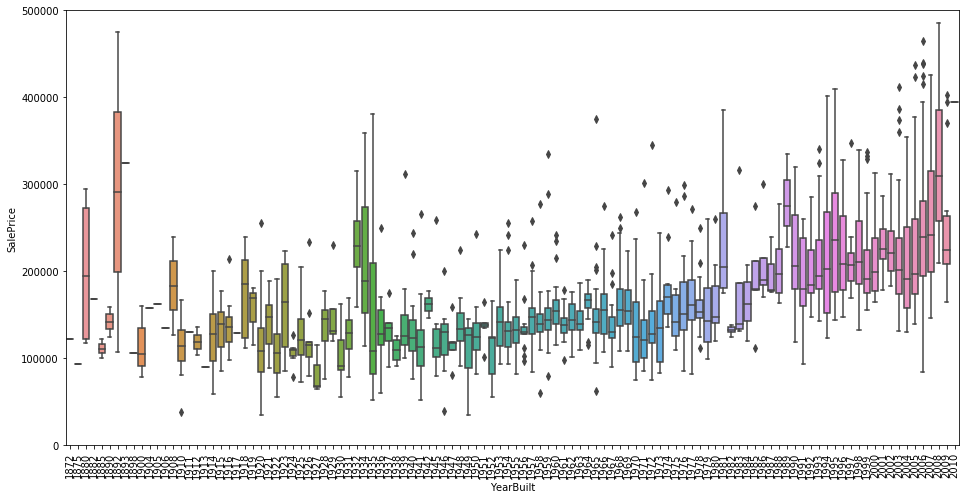

In [23]:
#check year built also as a lot of data here
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=500000);
plt.xticks(rotation=90);

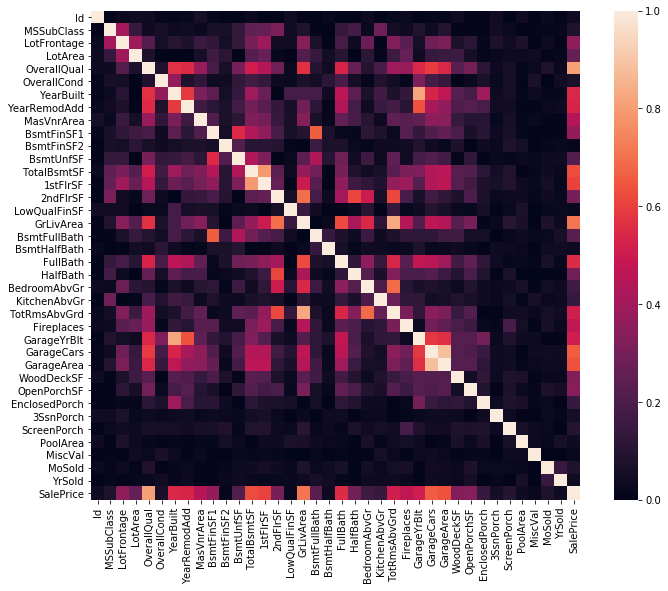

In [24]:
#Correlation matrix to see how features are correlated with SalePrice
corrmat = train.corr()
corrmat = abs(corrmat)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=0, square=True)

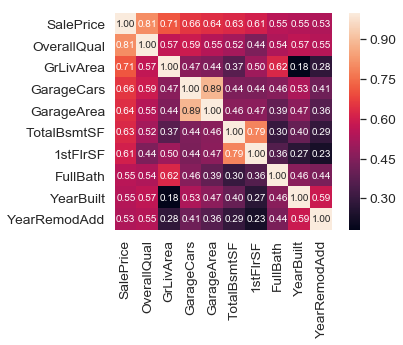

In [25]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

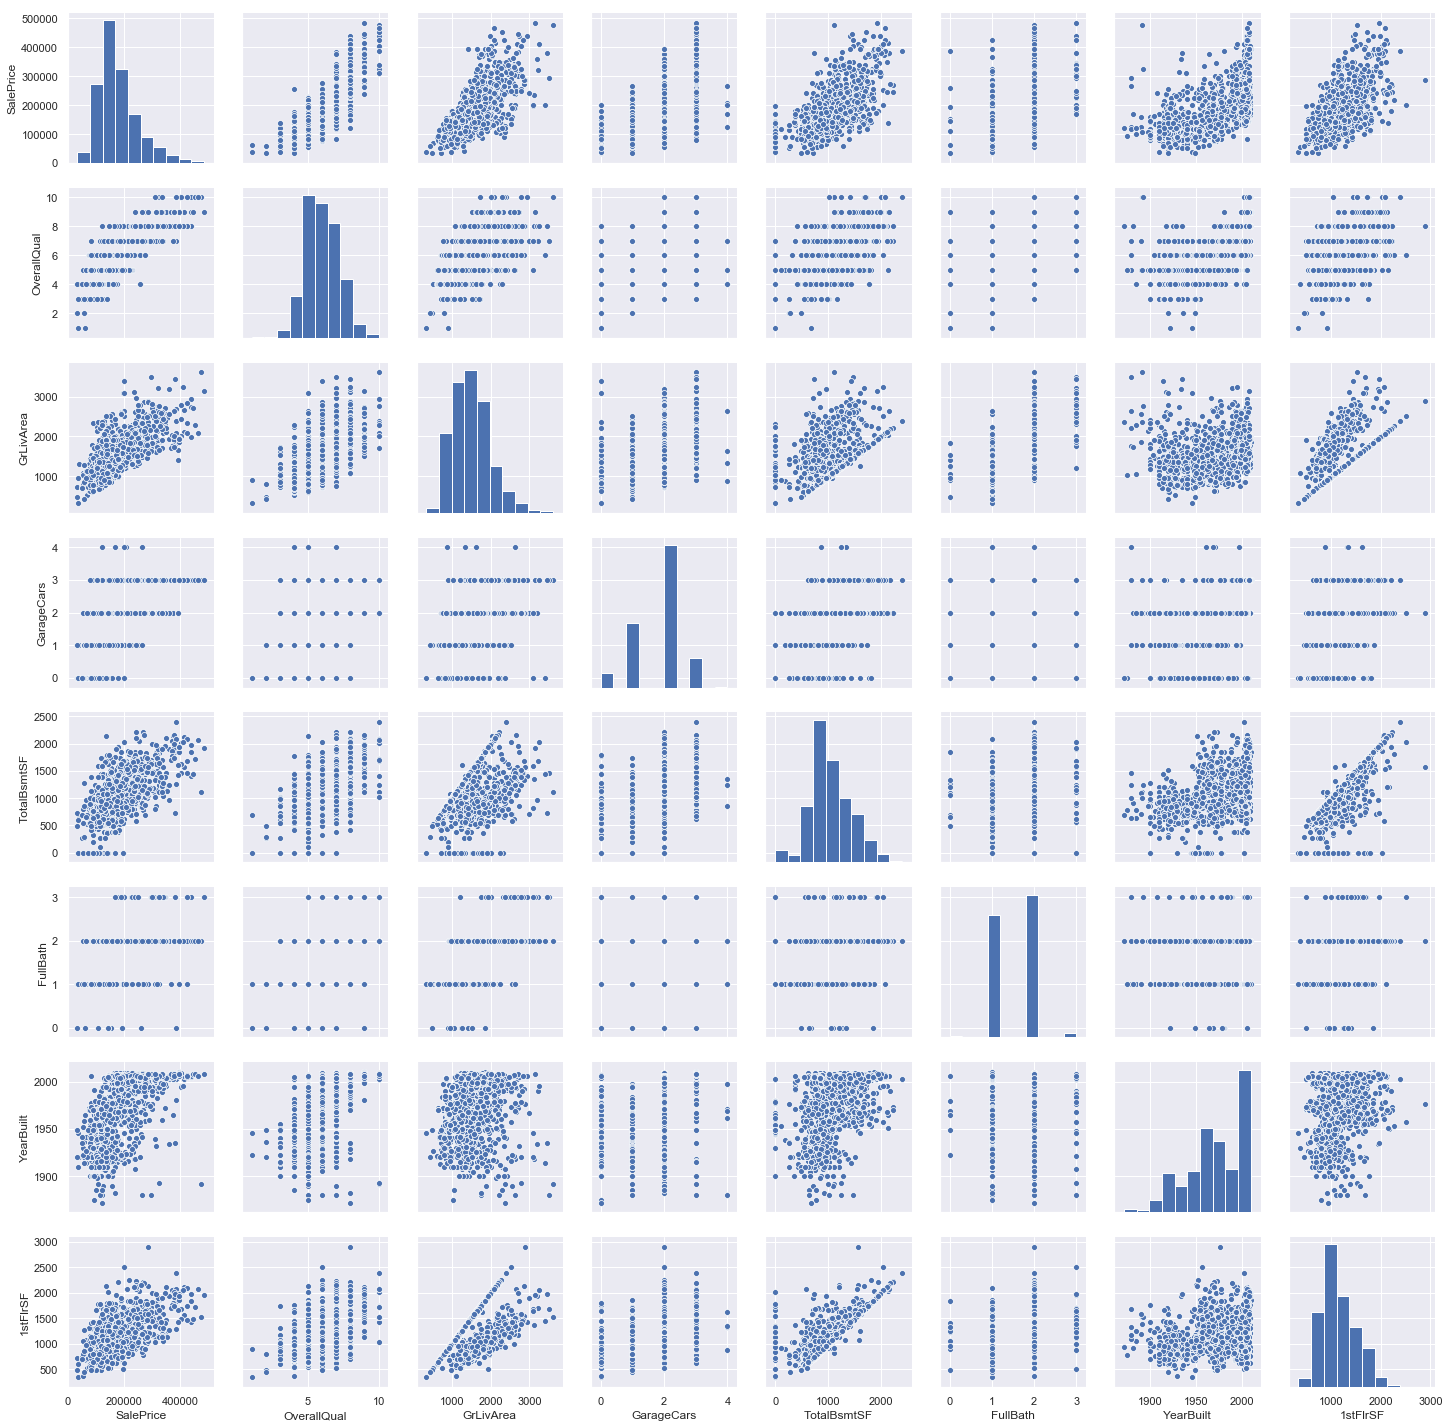

In [26]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [27]:
#save the train shape for when we recombine later
nTrain = train.shape[0]
nTest = test.shape[0]

In [28]:
#concat the data together
yTrain = train['SalePrice']
allData = pd.concat((train, test)).reset_index(drop=True)
allData = allData.drop(['SalePrice'], axis=1)
print("all_data size is : {}".format(allData.shape))

all_data size is : (2904, 80)


In [29]:
#check ratio of missing values
missingData = (allData.isnull().sum() / len(allData)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(30)

,Missing Ratio
PoolQC,99.725
MiscFeature,96.384
Alley,93.182
Fence,80.406
FireplaceQu,48.898
LotFrontage,16.667
GarageQual,5.475
GarageCond,5.475
GarageFinish,5.475
GarageYrBlt,5.475


In [30]:
#now replace the NA in allData with None
allData[['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
           ,'BsmtFinType2','FireplaceQu','GarageType','GarageFinish'
           ,'GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType']] = allData[['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
                                                                                                 ,'BsmtFinType2','FireplaceQu','GarageType','GarageFinish'
                                                                                                 ,'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'
                                                                                                 ,'MasVnrType']].fillna("None")

In [31]:
#we have a couple more here where if NA in the data it means there is 0 or doesn't exist in the house
allData[['GarageYrBlt','MasVnrArea','GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
         'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']] = allData[['GarageYrBlt','MasVnrArea','GarageArea',
                                                                   'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                                                   'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [32]:
#For some of the categorical data we can fill it with the most common string
allData['Electrical'] = allData['Electrical'].fillna(allData['Electrical'].mode()[0])
allData['Exterior1st'] = allData['Exterior1st'].fillna(allData['Exterior1st'].mode()[0])
allData['Exterior2nd'] = allData['Exterior2nd'].fillna(allData['Exterior2nd'].mode()[0])
allData['KitchenQual'] = allData['KitchenQual'].fillna(allData['KitchenQual'].mode()[0])
allData['MSZoning'] = allData['MSZoning'].fillna(allData['MSZoning'].mode()[0])
allData['Functional'] = allData['Functional'].fillna(allData['Functional'].mode()[0])
allData['SaleType'] = allData['SaleType'].fillna(allData['SaleType'].mode()[0])
allData['Utilities'] = allData['Utilities'].fillna(allData['Utilities'].mode()[0])

In [33]:
tempList = []
for data in allData['LotFrontage']:
    if(math.isnan(data)):
        print("nan found")
    else:
        tempList.append(data)

nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found
nan found


In [34]:
print(tempList)

[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51.0, 50.0, 70.0, 85.0, 91.0, 51.0, 72.0, 66.0, 70.0, 101.0, 57.0, 75.0, 44.0, 110.0, 60.0, 98.0, 47.0, 60.0, 50.0, 85.0, 70.0, 60.0, 108.0, 112.0, 74.0, 68.0, 65.0, 84.0, 115.0, 70.0, 61.0, 48.0, 84.0, 33.0, 66.0, 52.0, 110.0, 68.0, 60.0, 100.0, 24.0, 89.0, 66.0, 60.0, 63.0, 60.0, 44.0, 50.0, 76.0, 72.0, 47.0, 81.0, 95.0, 69.0, 74.0, 85.0, 60.0, 21.0, 50.0, 72.0, 60.0, 100.0, 32.0, 78.0, 80.0, 121.0, 122.0, 40.0, 105.0, 60.0, 60.0, 85.0, 80.0, 60.0, 69.0, 78.0, 73.0, 85.0, 77.0, 77.0, 64.0, 94.0, 75.0, 60.0, 50.0, 85.0, 105.0, 75.0, 77.0, 61.0, 34.0, 74.0, 90.0, 65.0, 50.0, 75.0, 55.0, 48.0, 60.0, 55.0, 69.0, 69.0, 88.0, 75.0, 78.0, 80.0, 82.0, 73.0, 65.0, 70.0, 78.0, 71.0, 78.0, 70.0, 24.0, 51.0, 63.0, 120.0, 107.0, 84.0, 60.0, 60.0, 92.0, 100.0, 134.0, 110.0, 95.0, 55.0, 40.0, 62.0, 86.0, 62.0, 141.0, 44.0, 80.0, 47.0, 84.0, 97.0, 60.0, 54.0, 60.0, 63.0, 92.0, 90.0, 60.0, 64.0, 41.0, 70.0, 68.0, 24.0, 60.0, 24.0, 79.0, 174.0, 92.0, 76.0, 80

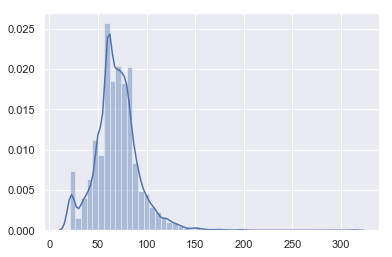

In [35]:
#histogram to get a better understanding of potential outliers before imputing
sns.distplot(tempList)

In [36]:
newList = []
for values in tempList:
    if values > 150:
        print(values)
    else:
        newList.append(values)

174.0
174.0
313.0
168.0
182.0
152.0
153.0
160.0
195.0
155.0
200.0
160.0


In [37]:
new = mean(newList, len(newList))

In [38]:
print(new)

68.49584717607974


In [39]:
newList.sort()

In [40]:
print(len(newList)/2)

1204.0


In [41]:
print(newList[1204])

68.0


In [42]:
#for lot frontage we use the mean as an imputer as the outliers didnt have much weight
imp=sk.preprocessing.Imputer(missing_values="NaN", strategy="mean" )
imp.fit(allData[['LotFrontage']])
allData['LotFrontage']=imp.transform(allData[['LotFrontage']])

In [43]:
#check ratio of missing values
missingData = (allData.isnull().sum() / len(allData)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(30)

,Missing Ratio


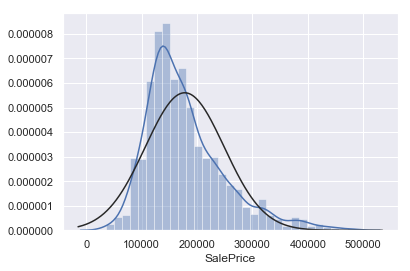

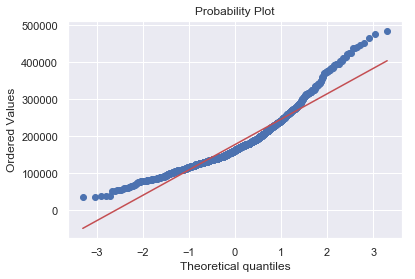

In [44]:
#histogram and normal probability plot
sns.distplot(yTrain, fit=norm)
fig = plt.figure()
res = stats.probplot(yTrain, plot=plt)

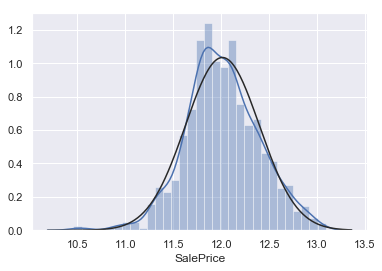

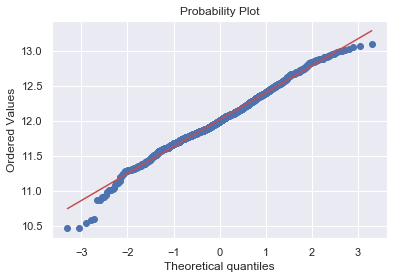

In [45]:
#applying log transformation to the 'SalePrice'
yTrain = np.log1p(yTrain)
#show the new log transformed data
sns.distplot(yTrain, fit=norm)
fig = plt.figure()
res = stats.probplot(yTrain, plot=plt)

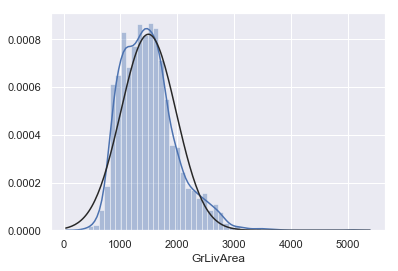

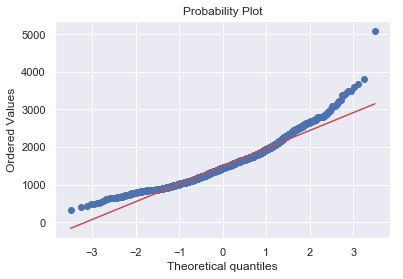

In [46]:
#histogram and normal probability plot
sns.distplot(allData['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(allData['GrLivArea'], plot=plt)

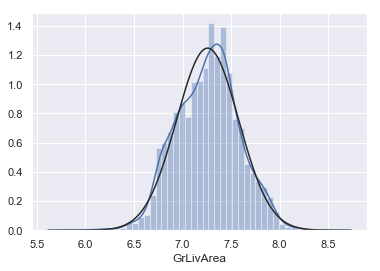

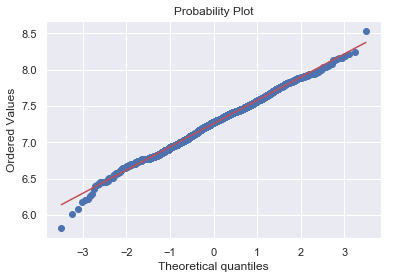

In [47]:
#applying log transformation to the 'GrLivArea'
allData['GrLivArea'] = np.log1p(allData['GrLivArea'])

#histogram and normal probability plot
sns.distplot(allData['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(allData['GrLivArea'], plot=plt)

In [48]:
numeric_feats = allData.dtypes[allData.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = allData[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.891
PoolArea,18.666
LotArea,13.342
LowQualFinSF,12.057
3SsnPorch,11.346
KitchenAbvGr,4.289
BsmtFinSF2,4.157
EnclosedPorch,4.008
ScreenPorch,3.973
BsmtHalfBath,3.934


In [49]:
skewness = skewness[abs(skewness) > 0.7]

skewedFeatures = skewness.index
newLambda = 0.15

for feat in skewedFeatures:
    allData[feat] = boxcox1p(allData[feat], newLambda)

In [50]:
#convert categorical to numerical
allData = pd.get_dummies(allData)

In [51]:
#sorting data back
train = allData[:nTrain]
test = allData[:nTest]

#drop 'Id'
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [52]:
#rmse function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## Modeling

### Simple Linear Regression - train/validate/test split

In [53]:
#first lets do a basic and see how we go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [54]:
#note yTrain is sale price

In [55]:
#start with a 80/20 split in the data for testing, we'v;e normalised a lot of it soooo see how it goes
trainX, testX, trainY, testY = train_test_split(train, yTrain, test_size = 0.2)
#lets make a validation set
trainX, validateX, trainY, validateY = train_test_split(trainX, trainY, test_size = 0.3)

In [56]:
reg = LinearRegression().fit(trainX,trainY)
regPredY = reg.predict(validateX)
print('Root Mean Squared Err', np.sqrt(mean_squared_error(validateY, regPredY)))

Root Mean Squared Err 0.15695615718483352


In [57]:
regPredY = reg.predict(testX)
print('Root Mean Squared Err', np.sqrt(mean_squared_error(testY, regPredY)))

Root Mean Squared Err 0.14174858139090302


### Gradient Boosted Regressor - Kfold splits

In [58]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
#splitting into 5 for cross validation
kf = KFold(n_splits=5, shuffle = True)
for trainIndex, testIndex in kf.split(train):
    xtrain, xtest, ytrain, ytest = train.iloc[trainIndex], train.iloc[testIndex], yTrain.iloc[trainIndex], yTrain.iloc[testIndex]

In [60]:
#using a loop to help tune hyper parameters

In [61]:
estimators = [50,100,150,200,300,400,500,600,700]
learnings = [0.1, 0.01, 0.001, 0.0001]
depth = [3,4,5,6,7,8,9,10]
split = [3,4,5,6,7]
results = []
for est in split:
    GradBoostCLF = GradientBoostingRegressor(n_estimators = 600, learning_rate= 0.1, max_features="sqrt",
                                             loss="ls", max_depth=est, criterion= "friedman_mse", min_samples_split=3)
    reg = GradBoostCLF.fit(xtrain, ytrain)
    regPredY = reg.predict(xtest)
    rmse =  np.sqrt(mean_squared_error(ytest, regPredY))
    results.append(rmse)

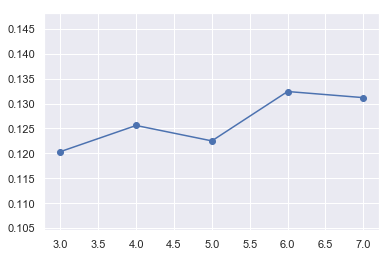

In [62]:
plt.figure()
plt.scatter(split, results)
plt.plot(split, results)

In [63]:
print(results)

[0.12034590569242196, 0.12559596169171117, 0.12250383445173202, 0.13241157273566362, 0.13118182581201232]


In [64]:
GradBoostCLF = GradientBoostingRegressor(n_estimators = 600, learning_rate= 0.1, max_features="sqrt", loss="ls",
                                         max_depth=4, criterion= "friedman_mse", min_samples_split=3)
reg = GradBoostCLF.fit(xtrain, ytrain)
regPredY = reg.predict(xtest)
rmse =  np.sqrt(mean_squared_error(ytest, regPredY))
print(rmse)

0.12358330632038989


In [65]:
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))

Gradient Boosting score: 0.1236 (0.0000)



In [66]:
GradBoostCLF.fit(train, yTrain)
GboostTrainPred = GradBoostCLF.predict(train)
GBoostPred = GradBoostCLF.predict(test)
print(rmsle(yTrain, GboostTrainPred))

0.026875234469512125


## XG-Boost

In [67]:
import xgboost as xgb

In [68]:
kf = KFold(n_splits=5, shuffle = True)
for trainIndex, testIndex in kf.split(train):
    xtrain, xtest, ytrain, ytest = train.iloc[trainIndex], train.iloc[testIndex], yTrain.iloc[trainIndex], yTrain.iloc[testIndex]

In [69]:
estimators = [2500,2700,2900,3100]
learnings = [0.1, 0.01, 0.001, 0.0001]
depth = [3,4,5,6,7,8]
gamma = [0.1,0.05,0.01]
results = []

In [70]:
'''for est in gamma:
    XGBoostCLF = xgb.XGBRegressor(reg_lambda = 1, reg_alpha = 0.1, cyclic='thirfty',
                                 booster='gblinear', eval_metric='rmse',
                                 colsample_bytree = 0.5, learning_rate = 0.01,
                                  max_depth=3, n_estimators = 31000, verbosity=1,
                                  random_state =7, nthread = -1, gamma=0.5)
    
    reg = XGBoostCLF.fit(xtrain, ytrain)
    regPredY = reg.predict(xtest)
    rmse =  np.sqrt(mean_squared_error(ytest, regPredY))
    results.append(rmse)'''

"for est in gamma:\n    XGBoostCLF = xgb.XGBRegressor(reg_lambda = 1, reg_alpha = 0.1, cyclic='thirfty',\n                                 booster='gblinear', eval_metric='rmse',\n                                 colsample_bytree = 0.5, learning_rate = 0.01,\n                                  max_depth=3, n_estimators = 31000, verbosity=1,\n                                  random_state =7, nthread = -1, gamma=0.5)\n    \n    reg = XGBoostCLF.fit(xtrain, ytrain)\n    regPredY = reg.predict(xtest)\n    rmse =  np.sqrt(mean_squared_error(ytest, regPredY))\n    results.append(rmse)"

In [71]:
'''plt.figure()
plt.scatter(gamma, results)
plt.plot(gamma, results)'''

'plt.figure()\nplt.scatter(gamma, results)\nplt.plot(gamma, results)'

In [72]:
print(results)

[]


In [73]:
XGBoostCLF = xgb.XGBRegressor(reg_lambda = 1, reg_alpha = 0.1, cyclic='thirfty',
                                 booster='gblinear', eval_metric='rmse',
                                 colsample_bytree = 0.5, learning_rate = 0.01,
                                  max_depth=3, n_estimators = 31000, verbosity=1,
                                  random_state =7, nthread = -1, gamma=0.5)

In [74]:
XGBoostCLF.fit(train, yTrain)
XGboostTrainPred = XGBoostCLF.predict(train)
XGBoostPred = np.expm1(XGBoostCLF.predict(test))
print(rmsle(yTrain, XGboostTrainPred))

0.22207238766113888


## Ensembling Models Method

In [75]:
import lightgbm as gbm
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score

First set up cross validation using k-Folds: K-folds splits the data k amount of times and creates a train and test that then tests across all splits and then switches between all data

In [76]:
#here we have our function for rmse using cross val over kfolds and using mean squared
nFolds = 5
def modelRMSE(model):
    kf = KFold(nFolds, shuffle = True).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, yTrain, scoring ="neg_mean_squared_error", cv=kf))
    return(rmse)

In [77]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, yTrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Models

Lasso Regression: This model may be sensitive to outliers. In order to make to more robust we use Robustscaler() method from sklearn on pipeline. RobustScaler() uses the IQR to help grab the median of the data and ignore outliers

In [78]:
Lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.1))

Elastic Net Regression: Like Lasso uses L1 reguralization but now uses L2 reguralization aswell.

In [79]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.1, l1_ratio=0.9))

Kernel Ridge Regression: Uses a ridge regression with L2 reguralization, learns a linear function in the space induced by the respective kernal and the data

In [80]:
KRR = KernelRidge(alpha=0.1, kernel='polynomial')

Gradient Boost regressor, that we tuned paramters earlier for.

In [81]:
GradBoostCLF = GradientBoostingRegressor(n_estimators = 600, learning_rate= 0.1, max_features="sqrt", loss="ls",
                                         max_depth=4, criterion= "friedman_mse", min_samples_split=3)

XGBoost - tuned prior aswell

In [82]:
XGBoostCLF = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

LightGBM - using tuned parameters from https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/output

In [83]:
LightGBM = gbm.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

## Check Performance of each model

In [84]:
newRmse = modelRMSE(Lasso)
print("Lasso:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

Lasso:  0.2460 (0.0145)



In [85]:
newRmse = modelRMSE(ENet)
print("ElasticNet:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

ElasticNet:  0.2351 (0.0139)



In [86]:
newRmse = modelRMSE(KRR)
print("Kernel Ridge Regressor:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

Kernel Ridge Regressor:  0.1422 (0.0098)



In [87]:
newRmse = modelRMSE(GradBoostCLF)
print("GradBoostCLF:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

GradBoostCLF:  0.1180 (0.0063)



In [88]:
newRmse = modelRMSE(XGBoostCLF)
print("XGBoostCLF:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

XGBoostCLF:  0.1154 (0.0054)



In [89]:
newRmse = modelRMSE(LightGBM)
print("LightGBM:  {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

LightGBM:  0.1155 (0.0057)



## Stacking approach 1 Averaging base models

build a new class that averages the models we have

In [90]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

Lets average 4 of our models and check the score

In [91]:
averagedModels = AveragingModels(models = (ENet, KRR, Lasso, GradBoostCLF))
newRmse = modelRMSE(averagedModels)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

 Averaged base models score: 0.1549 (0.0114)



In [95]:
averagedModels.fit(train, yTrain.values)
averagedModelsPred = averagedModels.predict(train)
avgPred = averagedModels.predict(test)
print(rmsle(yTrain.values, averagedModelsPred))

0.12424017943852911


## More advanced Average stacking class

In [96]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],  y.values[train_index]) #y.values return a numpy representation as a dataframe
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [98]:
stackedAverageModels = StackingAveragedModels(base_models=(ENet, GradBoostCLF, KRR), meta_model=Lasso)

newRmse = modelRMSE(stackedAverageModels)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(newRmse.mean(), newRmse.std()))

 Averaged base models score: 0.1772 (0.0128)



In [103]:
stackedAverageModels.fit(train.values, yTrain)
stackedTrainPred = stackedAverageModels.predict(train.values)
stackedPrediction = np.expm1(stackedAverageModels.predict(test))
print(np.sqrt(mean_squared_error(yTrain, stackedTrainPred)))

0.1426951378303139


In [99]:
XGBoostCLF.fit(train, yTrain)
XGBoostCLFPred = XGBoostCLF.predict(train)
xgbPred = np.expm1(XGBoostCLF.predict(test))
print(np.sqrt(mean_squared_error(yTrain, XGBoostCLFPred)))

0.07925917725362769


In [100]:
LightGBM.fit(train, yTrain)
LightGBMPred = LightGBM.predict(train)
LightGBM = np.expm1(LightGBM.predict(test))
print(np.sqrt(mean_squared_error(yTrain, LightGBMPred)))

0.07250289037155834


In [105]:
ensemble = stackedPrediction*0.70 + xgbPred*0.15 + LightGBM*0.15

## Saving

In [106]:
#creating the csv
sub = pd.DataFrame()
sub['Id'] = testId
sub['SalePrice'] = ensemble
sub.to_csv('LightModel.csv',index=False)